<a href="https://colab.research.google.com/github/Grupo242022/EyCD/blob/main/Rta_Entregable_2_Parte1_Ejercicio2_Vp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

## Entregable # 1 Ejercicios 2 y 3

## GRUPO Nº20

Integrantes:
*   Gabriela Artazo
*   Pablo Iribarren
*   Julia Martin
*   Daniela Paira  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### 2. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.



### Creamos el data frame a partir de los datos de precios de casas de Melbourne

1.   *df_melb* -> Presenta los datos de los precios de las casas de Melbourne.





In [ ]:
url_1 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'

df_melb = pd.read_csv(url_1)



### * Exploramos las columnas del df:

In [ ]:
print(df_melb.columns)


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [ ]:
# Descripción General del conjunto df_melb:
df_melb.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.00,2.94,0.96,1.00,2.00,3.00,3.00,10.00
Price,13580.00,1075684.08,639310.72,85000.00,650000.00,903000.00,1330000.00,9000000.00
Distance,13580.00,10.14,5.87,0.00,6.10,9.20,13.00,48.10
Postcode,13580.00,3105.30,90.68,3000.00,3044.00,3084.00,3148.00,3977.00
Bedroom2,13580.00,2.91,0.97,0.00,2.00,3.00,3.00,20.00
Bathroom,13580.00,1.53,0.69,0.00,1.00,1.00,2.00,8.00
Car,13518.00,1.61,0.96,0.00,1.00,2.00,2.00,10.00
Landsize,13580.00,558.42,3990.67,0.00,177.00,440.00,651.00,433014.00
BuildingArea,7130.00,151.97,541.01,0.00,93.00,126.00,174.00,44515.00
YearBuilt,8205.00,1964.68,37.27,1196.00,1940.00,1970.00,1999.00,2018.00


El subconjunto de columnas relevantes al problema de predicción del valor de la propiedad son: Suburb, Rooms, Type, Price, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt.

Para predecir el precio de una propiedad, es importante seleccionar las características relevantes que influyen en su valor. Las columnas que mencionaste son todas relevantes y pueden proporcionar información valiosa para un modelo de predicción de precios. Permíteme explicarte por qué cada una de estas columnas podría ser relevante:

Suburb: El suburbio o barrio en el que se encuentra la propiedad puede afectar significativamente el precio. Algunos suburbios son más exclusivos o deseados que otros debido a su ubicación, servicios, escuelas cercanas, etc.

Rooms: La cantidad de habitaciones en la propiedad (dormitorios y salas de estar) es un factor importante. Cuantas más habitaciones tenga, es probable que el precio sea más alto.

Type: El tipo de propiedad (casa, apartamento, unidad, etc.) también influye. Las casas independientes generalmente tienen un precio diferente al de los apartamentos o unidades.

Price: Aunque esto parece redundante, podría ser útil para un modelo si se trata de un conjunto de datos históricos. Sin embargo, en un escenario de predicción, normalmente no se incluiría esta columna.

Distance: La distancia a puntos de interés como el centro de la ciudad, transporte público, parques, etc., puede afectar el precio. Las propiedades más cercanas a servicios suelen tener un precio más alto.

Postcode: El código postal también está relacionado con la ubicación y puede influir en el precio. Diferentes áreas pueden tener diferentes niveles de demanda y calidad de vida. Nos permitirá unir los datos con la base de datos de Airbnb.

Bedroom2 y Bathroom: El número de dormitorios y baños es crucial. Las propiedades con más habitaciones y baños suelen tener un precio más alto.

Car: La cantidad de plazas de aparcamiento también es relevante. Las propiedades con estacionamiento seguro pueden ser más atractivas para los compradores.

Landsize y BuildingArea: El tamaño del terreno y el área construida son factores importantes. Propiedades más grandes o con más espacio habitable pueden tener un precio más alto.

YearBuilt: El año de construcción puede afectar el precio. Las propiedades más nuevas o renovadas pueden tener un valor superior.

En resumen, estas columnas proporcionan información sobre la ubicación, el tamaño, las comodidades y otros factores que influyen en el precio de una propiedad. Al usar estas características en un modelo de regresión, podrías obtener una estimación más precisa del precio.



Consideramos que las siguientes columnas no son relavantes por lo siguiente:

Address: La dirección específica de una propiedad es única y no generalizable. En lugar de proporcionar una información útil para la predicción del precio, puede introducir ruido debido a su alta cardinalidad y unicidad.

Method: Aunque el método de venta (por ejemplo, subasta, venta privada, etc.) puede influir en el precio de venta en algunos casos, no es un factor determinante del valor intrínseco de la propiedad. Además, la influencia de este factor puede ser marginal comparada con características más tangibles como el tamaño, la ubicación y el estado de la propiedad.

SellerG: no debería afectar significativamente el precio de una propiedad. Aunque algunos agentes pueden tener más éxito vendiendo propiedades a mejores precios, esto no es una característica intrínseca de la propiedad en sí.

Date: Aunque el mercado inmobiliario fluctúa con el tiempo, la fecha específica de venta no proporciona información sobre las características físicas y de ubicación de la propiedad. Para capturar tendencias temporales, sería más útil utilizar una variable que represente el ciclo del mercado (por ejemplo, el trimestre o el año).

CouncilArea y Regionname: puede proporcionar información sobre la administración local y algunos aspectos generales de la ubicación, esta información puede ser redundante si ya se tiene en cuenta la latitud, longitud y el nombre de la región.

Lattitude  y Longtitude: Las coordenadas geográficas precisas pueden no ser necesarias si ya se considera la región y el barrio donde se encuentra la propiedad. Estas variables también pueden introducir complejidad adicional sin proporcionar una ventaja significativa en la predicción.

Propertycount: indica el número de propiedades en una región específica, es una medida más general de la densidad de propiedades, pero no necesariamente del valor de una propiedad específica.



Filtración en base a las columnas seleccionadas

In [ ]:
# Seleccionar las columnas deseadas
columnas_deseadas = ['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode',
                     'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                     'YearBuilt',]

# Crear el DataFrame filtrado
df_melb_filtrado = df_melb[columnas_deseadas]

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(df_melb_filtrado.head())

       Suburb  Rooms Type      Price  Distance  Postcode  Bedroom2  Bathroom  \
0  Abbotsford      2    h 1480000.00      2.50   3067.00      2.00      1.00   
1  Abbotsford      2    h 1035000.00      2.50   3067.00      2.00      1.00   
2  Abbotsford      3    h 1465000.00      2.50   3067.00      3.00      2.00   
3  Abbotsford      3    h  850000.00      2.50   3067.00      3.00      2.00   
4  Abbotsford      4    h 1600000.00      2.50   3067.00      3.00      1.00   

   Car  Landsize  BuildingArea  YearBuilt  
0 1.00    202.00           NaN        NaN  
1 0.00    156.00         79.00    1900.00  
2 0.00    134.00        150.00    1900.00  
3 1.00     94.00           NaN        NaN  
4 2.00    120.00        142.00    2014.00  


In [ ]:
df_melb_filtrado.Price.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

In [ ]:
print(f'Consultando el total de datos nulos para la columna Price: {df_melb_filtrado.Price.isnull().sum()}')

Consultando el total de datos nulos para la columna Price: 0


### Observamos que:

*  El precio de las propiedades varían desde \$85.000 dólares hasta \$9.000.000

*  La desviación estandar es \$639.310.




### * Visualizamos en un boxplot la distribución de los valores (Precio):

Text(0.5, 1.0, 'Distribución de los Precios de Casas en Melbourne')

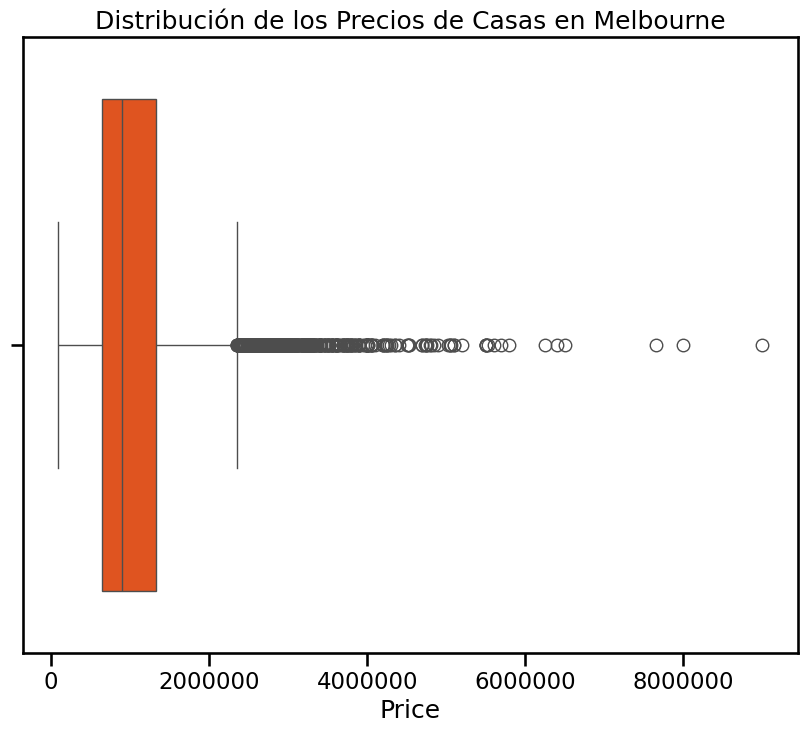

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_melb_filtrado, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de los Precios de Casas en Melbourne')

### * Para reducir el impacto de los valores atípicos en el análisis y en los modelos predictivos, definimos los umbrales según los cuantiles *0.05* y *0.95*, y filtramos la informacion en función de los mismos.
Los precios de las propiedades que se encuentran en los extremos (muy bajos o muy altos) pueden no ser representativos del mercado general y pueden sesgar los resultados.


In [ ]:
quantile_05 = 0.05
quantile_95 = 0.95

# Filtrado a partir de cuantiles:
df_melb_filtrado_perc = df_melb_filtrado.loc[ (df_melb_filtrado.Price > df_melb_filtrado.Price.quantile(quantile_05)) \
                           & (df_melb_filtrado.Price < df_melb_filtrado.Price.quantile(quantile_95))]


df_melb_filtrado_perc.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,12214.00,2.96,0.88,1.00,2.00,3.00,3.00,10.00
Price,12214.00,1011430.30,430553.36,406000.00,672000.00,904000.00,1290000.00,2290000.00
Distance,12214.00,10.30,5.90,0.00,6.30,9.70,13.10,48.10
Postcode,12214.00,3103.64,90.96,3000.00,3044.00,3082.00,3147.00,3977.00
Bedroom2,12214.00,2.93,0.89,0.00,2.00,3.00,3.00,20.00
Bathroom,12214.00,1.51,0.65,0.00,1.00,1.00,2.00,8.00
Car,12155.00,1.61,0.95,0.00,1.00,2.00,2.00,10.00
Landsize,12214.00,523.84,1513.17,0.00,188.25,438.00,648.00,76000.00
BuildingArea,6352.00,149.69,570.14,0.00,96.00,126.00,168.00,44515.00
YearBuilt,7280.00,1965.09,37.16,1196.00,1941.00,1970.00,2000.00,2018.00


### * Comparando los conjuntos de datos (inicial vs filtrado a partir de cuantiles):

In [ ]:
print(f'Tamaño del conjunto inicial - df_melb_filtrado: {len(df_melb_filtrado)}')
print(f'Media del conjunto inicial - df_melb_filtrado:  {df_melb_filtrado.Price.mean():.2f}')
print('---- ----- ----- ------ ----- ---- ----- ----- ------ ----- \n')

print(f'Tamaño del conjunto filtrado - df_melb_filtrado_perc: \t{len(df_melb_filtrado_perc)}')
print(f'Media del conjunto filtrado - df_melb_filtrado_perc:  \t{df_melb_filtrado_perc.Price.mean():.2f}')

print(f'Filas debajo del percentil 0.05 en el conjunto inicial: \
{len(df_melb_filtrado.loc[df_melb_filtrado.Price < df_melb_filtrado.Price.quantile(quantile_05)])}')

print(f'Filas arriba del percentil 0.95 en el conjunto inicial: \
{len(df_melb_filtrado.loc[df_melb_filtrado.Price > df_melb_filtrado.Price.quantile(quantile_95)])}')
print('---- ----- ----- ------ ----- ---- ----- ----- ------ ----- \n')

print(f'Filas extraídas del conjunto inicial: {len(df_melb_filtrado) - len(df_melb_filtrado_perc)}')

Tamaño del conjunto inicial - df_melb_filtrado: 13580
Media del conjunto inicial - df_melb_filtrado:  1075684.08
---- ----- ----- ------ ----- ---- ----- ----- ------ ----- 

Tamaño del conjunto filtrado - df_melb_filtrado_perc: 	12214
Media del conjunto filtrado - df_melb_filtrado_perc:  	1011430.30
Filas debajo del percentil 0.05 en el conjunto inicial: 671
Filas arriba del percentil 0.95 en el conjunto inicial: 679
---- ----- ----- ------ ----- ---- ----- ----- ------ ----- 

Filas extraídas del conjunto inicial: 1366


### * Boxplot: distribución de los valores (Precio) - filtrado por cuantil.

Text(0.5, 1.0, 'Distribución de los Precios de Casas en Melbourne - filtrado')

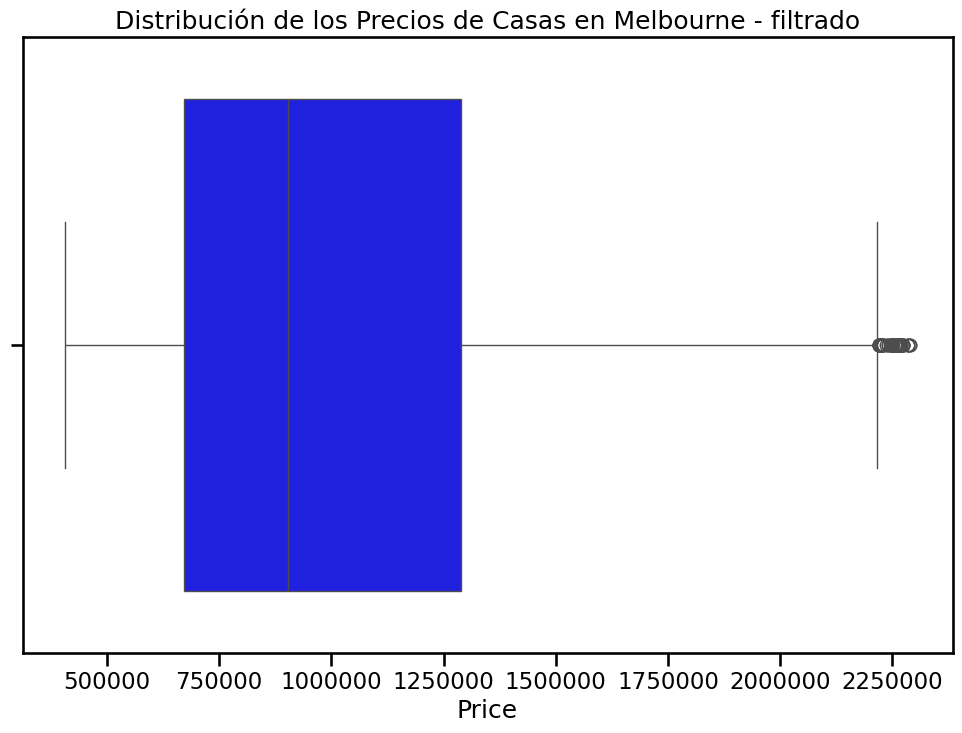

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melb_filtrado_perc, x='Price',
                color='blue')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de los Precios de Casas en Melbourne - filtrado')

### Consulta sobre el conjunto filtrado:

In [ ]:
# Habitaciones:
print(f'Máximo de habitaciones en el dataset: {df_melb_filtrado_perc.Rooms.max()}')

Máximo de habitaciones en el dataset: 10


### Construcción de un contador que separa y totaliza la cantidad de habitaciones presentes en el conjunto:

In [ ]:
def contar_habitaciones(column):

  for hab in range(column.max()+1):
    for row in column:

      contador = column.loc[column == hab].sum()
    print(f'Cantidad de casas con {hab} habitaciones: {contador}')

In [ ]:
contar_habitaciones(df_melb_filtrado_perc.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6812
Cantidad de casas con 3 habitaciones: 17025
Cantidad de casas con 4 habitaciones: 9408
Cantidad de casas con 5 habitaciones: 2140
Cantidad de casas con 6 habitaciones: 330
Cantidad de casas con 7 habitaciones: 49
Cantidad de casas con 8 habitaciones: 56
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


### Filtramos los registros en donde los baños y dormitorios superen el número de habitaciónes. A su vez, tomamos esto un como criterio de limpieza de la base de datos:

In [ ]:
df_melb_filtrado_perc.loc[~(df_melb_filtrado_perc.Rooms < df_melb_filtrado_perc.Bedroom2 + df_melb_filtrado_perc.Bathroom)].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,249.00,3.35,0.95,2.00,3.00,3.00,4.00,8.00
Price,249.00,1046680.72,410738.50,410000.00,758500.00,970000.00,1295000.00,2250000.00
Distance,249.00,8.45,3.69,1.50,6.30,8.20,11.20,34.90
Postcode,249.00,3083.86,57.86,3000.00,3039.00,3072.00,3127.00,3207.00
Bedroom2,249.00,2.14,0.88,0.00,2.00,2.00,3.00,6.00
Bathroom,249.00,1.01,0.54,0.00,1.00,1.00,1.00,3.00
Car,249.00,1.31,0.97,0.00,1.00,1.00,2.00,5.00
Landsize,249.00,424.06,351.16,0.00,209.00,426.00,600.00,4051.00
BuildingArea,117.00,143.50,114.37,20.00,99.00,126.00,155.00,1022.00
YearBuilt,131.00,1944.38,33.72,1890.00,1920.00,1950.00,1965.00,2014.00


### Eliminando aquellos registros que la cantidad de dormitorios y baños, superen la cantidad de habitaciones (para la limpieza del conjunto de datos):

In [ ]:
df_melb_filtrado_clean = df_melb_filtrado_perc.loc[df_melb_filtrado_perc.Rooms < df_melb_filtrado_perc.Bedroom2 + df_melb_filtrado_perc.Bathroom]

In [ ]:
# Conteo de los resultantes:
contar_habitaciones(df_melb_filtrado_clean.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6744
Cantidad de casas con 3 habitaciones: 16650
Cantidad de casas con 4 habitaciones: 9124
Cantidad de casas con 5 habitaciones: 2080
Cantidad de casas con 6 habitaciones: 306
Cantidad de casas con 7 habitaciones: 42
Cantidad de casas con 8 habitaciones: 40
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


In [ ]:
df_melb_filtrado_recort = df_melb_filtrado_clean.loc[df_melb_filtrado_clean.Rooms < 7]

df_melb_filtrado_recort.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,11953.00,2.94,0.86,1.00,2.00,3.00,3.00,6.00
Price,11953.00,1010356.66,430771.84,406000.00,670000.00,901000.00,1290000.00,2290000.00
Distance,11953.00,10.34,5.93,0.00,6.30,9.70,13.30,48.10
Postcode,11953.00,3104.05,91.51,3000.00,3044.00,3082.00,3148.00,3977.00
Bedroom2,11953.00,2.95,0.87,1.00,2.00,3.00,3.00,20.00
Bathroom,11953.00,1.52,0.64,0.00,1.00,1.00,2.00,8.00
Car,11894.00,1.62,0.95,0.00,1.00,2.00,2.00,10.00
Landsize,11953.00,525.79,1528.68,0.00,188.00,438.00,649.00,76000.00
BuildingArea,6230.00,149.76,575.47,0.00,96.00,126.00,168.01,44515.00
YearBuilt,7142.00,1965.46,37.12,1196.00,1945.00,1970.00,2000.00,2018.00


In [ ]:
print("Cantidad de suburbios por propiedades clasificadas por número de habitaciones")
print(df_melb_filtrado_recort.groupby("Rooms")["Suburb"].count())

Cantidad de suburbios por propiedades clasificadas por número de habitaciones
Rooms
1     283
2    3372
3    5550
4    2281
5     416
6      51
Name: Suburb, dtype: int64


### * Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico.
### * Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

### - Rta//: Ahora vamos a analizar el conjunto de datos df_airbnb:

#### Descriptivos:

In [ ]:
# Estadisticos descriptivo sobre el cojunto de datos:
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,22895.00,-37.83,0.07,-38.22,-37.85,-37.82,-37.80,-37.48
longitude,22895.00,145.01,0.13,144.48,144.96,144.98,145.01,145.84
price,22895.00,148.00,210.88,0.00,71.00,111.00,165.00,12624.00
weekly_price,2524.00,906.98,821.22,91.00,450.00,750.00,1066.00,11536.00
monthly_price,1891.00,3234.35,2808.09,400.00,1700.00,2800.00,3912.50,54258.00


#### Tipos de variables presentes en el conjunto de Airbnb:

In [ ]:
df_airbnb.dtypes

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object

### Revisamos la variable Zipcode:

In [ ]:
df_airbnb.zipcode.value_counts()

zipcode
3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: count, Length: 463, dtype: int64

### Como se puede notar algunos registros (por ejemplo caso *Zipcode*: 3000.0 -> 2491 y 3000 -> 876), estan tomados como valores flotantes y otros como enteros es por esto que se necesitan unificarlos.

In [ ]:
df_airbnb = df_airbnb.loc[~(df_airbnb.zipcode.isnull())]

In [ ]:
df_airbnb['zipcode'] = pd.to_numeric(df_airbnb.zipcode, errors='coerce')


In [ ]:
df_airbnb.zipcode.value_counts() # despues de unificar


zipcode
3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: count, Length: 247, dtype: int64

In [ ]:
len(df_airbnb.zipcode.unique())

248

### Agrupando la cantidad de registros presentes en zipcode:

In [ ]:
df_airbnb['zipcode_count'] = df_airbnb.groupby('zipcode')['zipcode'].transform('count')

In [ ]:
intersection = np.intersect1d(df_airbnb.zipcode.values, df_melb_filtrado_recort.Postcode.values, \
                              assume_unique=False)

# Controlando:
print(f'Valores únicos para Airbnb-Zipcodes len/unique: {df_airbnb.zipcode.isna().sum()}')
print(f'Valores únicos para Airbnb-Zipcodes len/unique: {len(df_airbnb.zipcode.unique())}')
print(f'Valores únicos para Airbnb-Zipcodes: {df_airbnb.zipcode.nunique()}')
print(f'Valores únicos para df_Melbourne-Zipcodes: {df_melb_filtrado_recort.Postcode.nunique()}')
print(f'Elementos en común entre los conjuntos de datos dado el zipcodes: {intersection.size}')

Valores únicos para Airbnb-Zipcodes len/unique: 4
Valores únicos para Airbnb-Zipcodes len/unique: 248
Valores únicos para Airbnb-Zipcodes: 247
Valores únicos para df_Melbourne-Zipcodes: 196
Elementos en común entre los conjuntos de datos dado el zipcodes: 191


### Se tomaron del conjunto de datos *df_airbnb* las variables relevantes: price, weekly_price, monthly_price, zipcode y se formo: *airbnb_price_by_zipcode* con columnas adicionales *(media y conteo)*:

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option:
# Pass as argument name the new name of the column, and as value a tuple where
# the first value is the original column and the second value is the operation.
airbnb_price_by_zipcode = df_airbnb[relevant_cols].groupby('zipcode')\
  .agg(airbnb_record_count=('price', 'count'),
       airbnb_price_mean=('price', 'mean'),
       airbnb_price_median=('price', 'median'),
       airbnb_weekly_price_mean=('weekly_price', 'mean'),
       airbnb_weekly_price_median=('weekly_price', 'median'),
       airbnb_monthly_price_mean=('monthly_price', 'mean'),
       airbnb_monthly_price_median=('monthly_price', 'median'))\
  .reset_index()


print(f'Forma airbnb_price_by_zipcode \n: {airbnb_price_by_zipcode.shape}')

Forma airbnb_price_by_zipcode 
: (247, 8)


In [ ]:
airbnb_price_by_zipcode.isna().sum()

zipcode                         0
airbnb_record_count             0
airbnb_price_mean               0
airbnb_price_median             0
airbnb_weekly_price_mean       63
airbnb_weekly_price_median     63
airbnb_monthly_price_mean      79
airbnb_monthly_price_median    79
dtype: int64

### Al consultar el paso anterior, decidimos tomar las variables de interés, dado que no presentan "datos faltantes":
- zipcode                        
- airbnb_record_count            
- airbnb_price_mean               
- airbnb_price_median            



In [ ]:
airbnb_price_by_zipcode = airbnb_price_by_zipcode.dropna(axis=1)

In [ ]:
airbnb_price_by_zipcode.isna().sum()

zipcode                0
airbnb_record_count    0
airbnb_price_mean      0
airbnb_price_median    0
dtype: int64

### Se realiza el merge de ambas dataframes a partir de zipcode:

In [ ]:
# Merge:
df_merged = df_melb_filtrado_recort.merge(airbnb_price_by_zipcode, how='left',\
    left_on='Postcode', right_on='zipcode')


In [ ]:
# Consultando valores nulos:
missing_values_count = df_merged['airbnb_price_mean'].isna().sum()
missing_values_count

17

### * Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas.

### Para investigar otras 2 variables que puedan servir para combinar los datos, se muestran la cantidad de registros y variables disponibles en cada una de ellas:

In [ ]:
print(f'Variables posibles en df_airbnb: \n{df_airbnb.nunique()}\n')
print('----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ')
print(f'Variables posibles en df_melb: \n{df_melb.nunique()}')


Variables posibles en df_airbnb: 
description              21545
neighborhood_overview    11973
street                     628
neighborhood                59
city                        30
suburb                     535
state                       26
zipcode                    247
latitude                 22732
longitude                22561
price                      458
weekly_price               593
monthly_price              632
zipcode_count              113
dtype: int64

----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 
Variables posibles en df_melb: 
Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         3

In [ ]:
# Mostrar el top 20 de respuestas más frecuentes en 'Suburb'
top_20_Suburb = df_melb['Suburb'].value_counts().head(20)
print("\nTop 20 respuestas más frecuentes en 'Suburb' en df_melb:")
print(top_20_Suburb)

# Mostrar el top 20 de respuestas más frecuentes en 'suburb'
top_20_suburb = df_airbnb['suburb'].value_counts().head(20)
print("\nTop 20 respuestas más frecuentes en 'suburb' en df_airbnb:")
print(top_20_suburb)



Top 20 respuestas más frecuentes en 'Suburb' en df_melb:
Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Essendon          220
South Yarra       202
Glen Iris         195
Hawthorn          191
Coburg            190
Northcote         188
Brighton          186
Kew               177
Pascoe Vale       171
Balwyn North      171
Yarraville        164
St Kilda          162
Glenroy           159
Port Melbourne    153
Moonee Ponds      149
Name: count, dtype: int64

Top 20 respuestas más frecuentes en 'suburb' en df_airbnb:
suburb
Melbourne          4226
Southbank          1233
South Yarra         881
Saint Kilda         805
Docklands           607
Richmond            570
Carlton             533
Brunswick           439
Fitzroy             378
North Melbourne     336
Elwood              328
Collingwood         295
South Melbourne     287
Northcote           280
West Melbourne      262
Prahran             262
Abbotsford        

In [ ]:
# Convertir columnas de suburbios a conjuntos
suburbs_melb = set(df_melb['Suburb'].unique())
suburbs_airbnb = set(df_airbnb['suburb'].unique())

# Encontrar la intersección de los conjuntos
suburbs_intersection = suburbs_melb.intersection(suburbs_airbnb)

# Mostrar las coincidencias
print("Coincidencias de suburbios entre df_melb y df_airbnb:")
print(suburbs_intersection)


Coincidencias de suburbios entre df_melb y df_airbnb:
{'Templestowe', 'Ripponlea', 'Lower Plenty', 'Strathmore', 'Kingsbury', 'Parkville', 'Sunbury', 'Cheltenham', 'Seaholme', 'Middle Park', 'Canterbury', 'East Melbourne', 'Carlton North', 'West Melbourne', 'Hughesdale', 'Briar Hill', 'Ivanhoe', 'Mount Waverley', 'Hampton Park', 'Prahran', 'Chadstone', 'Bundoora', 'Fairfield', 'Elwood', 'Bellfield', 'Cremorne', 'Hawthorn', 'Armadale', 'Eltham', 'Mont Albert', 'Yarra Glen', 'Moonee Ponds', 'Viewbank', 'Moorabbin', 'Clarinda', 'Mulgrave', 'South Morang', 'Braybrook', 'Kingsville', 'Clayton South', 'Altona North', 'Balwyn', 'Aberfeldie', 'West Footscray', 'Niddrie', 'Kurunjang', 'Mill Park', 'Blackburn South', 'Murrumbeena', 'Yarraville', 'Ringwood North', 'Ringwood East', 'Whittlesea', 'Preston', 'The Basin', 'Kensington', 'Princes Hill', 'Lalor', 'Burwood East', 'Melton South', 'Brunswick', 'Doncaster East', 'Burnside', 'Waterways', 'Hoppers Crossing', 'Coburg North', 'Mooroolbark', 'Fl

In [ ]:
# Convertir a minúsculas y eliminar espacios en blanco
df_melb['Suburb'] = df_melb['Suburb'].str.lower().str.strip()
df_airbnb['suburb'] = df_airbnb['suburb'].str.lower().str.strip()

# Encontrar coincidencias en las columnas de suburbios
suburbs_intersection = df_melb['Suburb'].isin(df_airbnb['suburb'])

# Filtrar df_melb con las coincidencias
df_melb_filtered = df_melb[suburbs_intersection]

# Filtrar df_airbnb con las coincidencias
df_airbnb_filtered = df_airbnb[df_airbnb['suburb'].isin(df_melb['Suburb'])]

# Mostrar todas las coincidencias
print("Coincidencias de suburbios entre df_melb y df_airbnb:")
print(df_melb_filtered['Suburb'].unique())






Coincidencias de suburbios entre df_melb y df_airbnb:
['abbotsford' 'airport west' 'albert park' 'alphington' 'altona'
 'altona north' 'armadale' 'ascot vale' 'ashburton' 'ashwood'
 'avondale heights' 'balaclava' 'balwyn' 'balwyn north' 'bentleigh'
 'bentleigh east' 'box hill' 'braybrook' 'brighton' 'brighton east'
 'brunswick' 'brunswick west' 'bulleen' 'burwood' 'camberwell'
 'canterbury' 'carlton north' 'carnegie' 'caulfield' 'caulfield north'
 'caulfield south' 'chadstone' 'clifton hill' 'coburg' 'coburg north'
 'collingwood' 'doncaster' 'eaglemont' 'elsternwick' 'elwood' 'essendon'
 'essendon north' 'fairfield' 'fitzroy' 'fitzroy north' 'flemington'
 'footscray' 'glen iris' 'glenroy' 'gowanbrae' 'hadfield' 'hampton'
 'hampton east' 'hawthorn' 'heidelberg heights' 'heidelberg west'
 'hughesdale' 'ivanhoe' 'kealba' 'keilor east' 'kensington' 'kew'
 'kew east' 'kooyong' 'maidstone' 'malvern' 'malvern east' 'maribyrnong'
 'melbourne' 'middle park' 'mont albert' 'moonee ponds' 'moorabb

### En resumen: de lo anterior notamos variables presentes en ambos conjuntos como: Suburb, suburb. Esto puede servir para combinar los datos.



### 3. Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.



In [ ]:
# Guardando el conjunto de datos:
df_merged.to_csv("melb_data_extended.csv", index=None)


from google.colab import files
files.download('melb_data_extended.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>